# EDA

Before we can attempt to implement a model, we must perform exploratory data analysis. This will allow us to better understand the data that was given to us.  

In [1]:
# Import Necessary modules 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
raw_data = pd.read_csv("../data/ucsbdata.csv")

In [3]:
# Initial observations 
raw_data.head(5)

,Index,R,US10YR,EPS,PER,OPEN,HIGH,LOW,CLOSE,BDIY,...,MYSTERYVAR3,TOM,HULBERTSENTIMENT,BUBBLE,CASH,DEBT,DIVIDEND,RETURN,STOCKS,WAR
0,1952-01-02,NaN,NaN,2.44,9.754098,23.80,23.80,23.80,23.80,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1952-01-03,NaN,NaN,2.44,9.786885,23.88,23.88,23.88,23.88,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952-01-04,NaN,NaN,2.44,9.803279,23.92,23.92,23.92,23.92,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1952-01-07,NaN,NaN,2.44,9.799180,23.91,23.91,23.91,23.91,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1952-01-08,NaN,NaN,2.44,9.762295,23.82,23.82,23.82,23.82,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Number of Observations and missing values
print("Number of observations:", len(raw_data.Index))
print("Number of variables:", len(raw_data.columns))
print("Number of missing values:", np.count_nonzero(raw_data.isnull()))
print("Number of observations with missing values:", raw_data.isnull().any(axis=1).sum())

Number of observations: 16863
Number of variables: 68
Number of missing values: 377472
Number of observations with missing values: 13848


In [5]:
# Return df will all the missing values
raw_data[raw_data.isnull().any(axis=1)]

,Index,R,US10YR,EPS,PER,OPEN,HIGH,LOW,CLOSE,BDIY,...,MYSTERYVAR3,TOM,HULBERTSENTIMENT,BUBBLE,CASH,DEBT,DIVIDEND,RETURN,STOCKS,WAR
0,1952-01-02,NaN,NaN,2.44,9.754098,23.80,23.80,23.80,23.80,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1952-01-03,NaN,NaN,2.44,9.786885,23.88,23.88,23.88,23.88,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952-01-04,NaN,NaN,2.44,9.803279,23.92,23.92,23.92,23.92,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1952-01-07,NaN,NaN,2.44,9.799180,23.91,23.91,23.91,23.91,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1952-01-08,NaN,NaN,2.44,9.762295,23.82,23.82,23.82,23.82,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1952-01-09,NaN,NaN,2.44,9.729508,23.74,23.74,23.74,23.74,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1952-01-10,NaN,NaN,2.44,9.778689,23.86,23.86,23.86,23.86,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1952-01-11,NaN,NaN,2.43,9.868313,23.98,23.98,23.98,23.98,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1952-01-14,NaN,NaN,2.43,9.942387,24.16,24.16,24.16,24.16,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1952-01-15,NaN,NaN,2.43,9.901235,24.06,24.06,24.06,24.06,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are a significant amount of missing values in the dataset. The first year with complete observations is 2008. This would allow us to create a model after the crash of the 2008 recession. However, if we wanted to work with years prior to 2008, we need to further analyze the missing values in the dataset. 

## Post Market Crash

The most recent US recession occerd in 2008. September 29, 2008 was the day the stock market crashed. Since this infamous day, there have been no such significant drop or gains with the stocks. We will assume the stock will not crash during this time of the contest. Our first model will consist of data from September 29, 2008 to the end of 2018. This will roughly give us 10 years worth of data. 

In [6]:
# Create dataset after stock market crash
initial_start = '2008-08-30'
stock_data1 = raw_data.loc[raw_data.Index > initial_start]
stock_data1.head(10)

,Index,R,US10YR,EPS,PER,OPEN,HIGH,LOW,CLOSE,BDIY,...,MYSTERYVAR3,TOM,HULBERTSENTIMENT,BUBBLE,CASH,DEBT,DIVIDEND,RETURN,STOCKS,WAR
14262,2008-09-02,-0.000925,3.7326,49.78,25.664524,1287.83,1303.04,1272.20,1277.58,6466.0,...,12.805545,1,11.7,102.145351,80.224149,52.613405,42.572673,20.866767,32.085132,43.392387
14263,2008-09-03,-0.021012,3.6990,49.78,25.612294,1276.61,1280.60,1265.59,1274.98,6146.0,...,12.747167,0,-2.1,87.724831,76.736143,59.870426,37.019715,22.681269,35.522825,40.981699
14264,2008-09-04,0.003075,3.6227,49.76,24.855908,1271.80,1271.80,1232.83,1236.83,5874.0,...,12.790740,0,-2.1,96.136801,81.386818,62.591809,45.040654,21.169184,36.668722,43.995059
14265,2008-09-05,0.020380,3.6986,49.76,24.966037,1233.21,1244.94,1217.23,1242.31,5663.0,...,12.944056,0,-2.1,99.741931,81.386818,61.684682,42.572673,20.866767,38.960517,44.597731
14266,2008-09-08,-0.021026,3.6743,49.75,25.483216,1249.50,1274.42,1247.12,1267.79,5492.0,...,12.891218,0,-9.0,98.540221,80.224149,54.427660,45.040654,20.564351,38.960517,47.611092
14267,2008-09-09,0.003986,3.5668,49.75,24.613266,1267.98,1268.66,1224.51,1224.51,5255.0,...,12.793818,0,-19.4,93.733381,84.874825,63.498937,37.019715,20.564351,42.398210,46.405748
14268,2008-09-10,0.014302,3.6295,49.75,24.764623,1227.50,1243.90,1221.60,1232.04,5026.0,...,12.938765,0,-19.4,94.935091,81.386818,68.941703,38.253706,23.588520,45.835903,47.008420
14269,2008-09-11,0.004553,3.6425,51.64,24.187645,1229.04,1249.98,1211.54,1249.05,4893.0,...,12.891278,0,-26.3,93.733381,82.549487,65.313192,45.040654,22.983686,41.252313,45.803076
14270,2008-09-12,-0.021058,3.7187,51.64,24.238962,1245.88,1255.09,1233.81,1251.70,4800.0,...,12.843551,0,-26.3,102.145351,81.386818,57.149043,47.508635,22.378852,43.544108,48.213764
14271,2008-09-15,0.016565,3.3868,51.62,23.105386,1250.92,1250.92,1192.70,1192.70,4747.0,...,12.888812,0,-19.4,109.355612,84.874825,59.870426,41.955678,21.471601,38.960517,48.816436


## Feature Selection

Our data is considered high dimension since it consists of 67 varaibles plus our target variable of prediction. In order for our model to run effectivly, we need to only select the varaibles that have the most influence in predicitng our desired variable. We will attempt various feature selection models to select the variable for our model



In [7]:
# Remove Data Dates and store dates
data_dates = stock_data1['Index']
data_dates.head(5)

14262    2008-09-02
14263    2008-09-03
14264    2008-09-04
14265    2008-09-05
14266    2008-09-08
Name: Index, dtype: object

In [8]:
# Remove data dates from our current complete dataset
no_dates = stock_data1.drop(columns=['Index'])
no_dates.head(5)

,R,US10YR,EPS,PER,OPEN,HIGH,LOW,CLOSE,BDIY,VIX,...,MYSTERYVAR3,TOM,HULBERTSENTIMENT,BUBBLE,CASH,DEBT,DIVIDEND,RETURN,STOCKS,WAR
14262,-0.000925,3.7326,49.78,25.664524,1287.83,1303.04,1272.20,1277.58,6466.0,21.99,...,12.805545,1,11.7,102.145351,80.224149,52.613405,42.572673,20.866767,32.085132,43.392387
14263,-0.021012,3.6990,49.78,25.612294,1276.61,1280.60,1265.59,1274.98,6146.0,21.43,...,12.747167,0,-2.1,87.724831,76.736143,59.870426,37.019715,22.681269,35.522825,40.981699
14264,0.003075,3.6227,49.76,24.855908,1271.80,1271.80,1232.83,1236.83,5874.0,24.03,...,12.790740,0,-2.1,96.136801,81.386818,62.591809,45.040654,21.169184,36.668722,43.995059
14265,0.020380,3.6986,49.76,24.966037,1233.21,1244.94,1217.23,1242.31,5663.0,23.06,...,12.944056,0,-2.1,99.741931,81.386818,61.684682,42.572673,20.866767,38.960517,44.597731
14266,-0.021026,3.6743,49.75,25.483216,1249.50,1274.42,1247.12,1267.79,5492.0,22.64,...,12.891218,0,-9.0,98.540221,80.224149,54.427660,45.040654,20.564351,38.960517,47.611092


In [9]:
# The variable that we are interested in predicting
actual_returns = stock_data1['R']
actual_returns.head(5)

14262   -0.000925
14263   -0.021012
14264    0.003075
14265    0.020380
14266   -0.021026
Name: R, dtype: float64

In [10]:
# The feature variables
feature_variables = stock_data1.drop(columns = ['Index', 'R'])
feature_variables.head(5)

,US10YR,EPS,PER,OPEN,HIGH,LOW,CLOSE,BDIY,VIX,PCR,...,MYSTERYVAR3,TOM,HULBERTSENTIMENT,BUBBLE,CASH,DEBT,DIVIDEND,RETURN,STOCKS,WAR
14262,3.7326,49.78,25.664524,1287.83,1303.04,1272.20,1277.58,6466.0,21.99,0.69,...,12.805545,1,11.7,102.145351,80.224149,52.613405,42.572673,20.866767,32.085132,43.392387
14263,3.6990,49.78,25.612294,1276.61,1280.60,1265.59,1274.98,6146.0,21.43,0.68,...,12.747167,0,-2.1,87.724831,76.736143,59.870426,37.019715,22.681269,35.522825,40.981699
14264,3.6227,49.76,24.855908,1271.80,1271.80,1232.83,1236.83,5874.0,24.03,0.79,...,12.790740,0,-2.1,96.136801,81.386818,62.591809,45.040654,21.169184,36.668722,43.995059
14265,3.6986,49.76,24.966037,1233.21,1244.94,1217.23,1242.31,5663.0,23.06,0.78,...,12.944056,0,-2.1,99.741931,81.386818,61.684682,42.572673,20.866767,38.960517,44.597731
14266,3.6743,49.75,25.483216,1249.50,1274.42,1247.12,1267.79,5492.0,22.64,0.77,...,12.891218,0,-9.0,98.540221,80.224149,54.427660,45.040654,20.564351,38.960517,47.611092


In [11]:
# Split data into training set and test set
train_data, test_data, train_lbl, test_lbl = train_test_split(feature_variables, 
                                                             actual_returns.values,
                                                             test_size = 0.2, 
                                                             random_state = 0)

### PCA

Although PCA is not considered a feature selection tool, we will attmept to use the transformed data in our model. 


In [12]:
# Initialize Class to apply standard transformation on data
scaler = StandardScaler()
# Fit ; Compute the mean and std to be used for later scaling
scaler.fit(train_data)
# Apply standard transformaiton to test and training data
transformed_train_data = scaler.transform(train_data)
transformed_test_data = scaler.transform(test_data)

C:\Users\SergioZambranoGuerra\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\SergioZambranoGuerra\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\SergioZambranoGuerra\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [13]:
# Initialize PCA class 
pca = PCA(svd_solver='full')
# Fit PCA to trainig set
pca.fit(transformed_train_data)
# Apply PCA to both training and test data
pca_train_data = pca.transform(transformed_train_data)
pca_test_data = pca.transform(transformed_test_data)

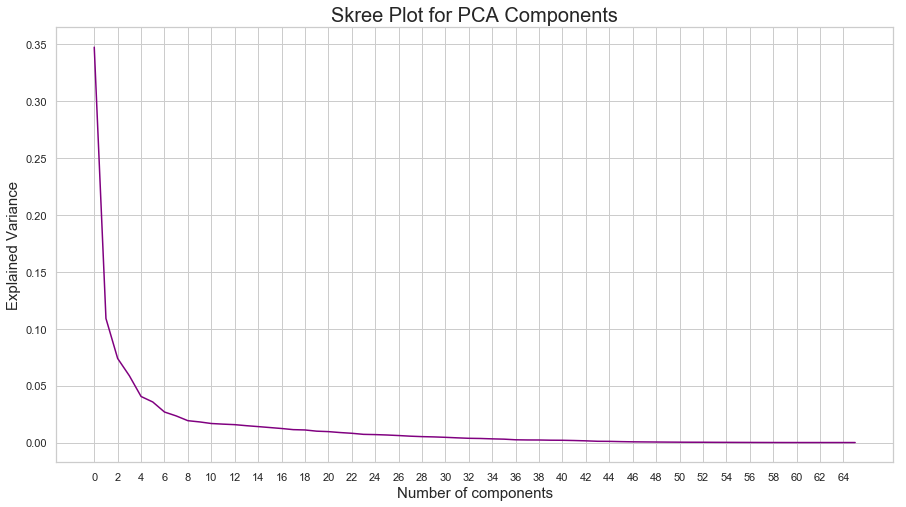

In [14]:
# Skree plot for PCA
plt.figure(figsize=(15,8))
sns.set(style="whitegrid")
sns.lineplot(x = range(66) , y = pca.explained_variance_ratio_,
            color = "purple")
plt.title("Skree Plot for PCA Components", size = 20)
plt.ylabel("Explained Variance", size = 15)
plt.xlabel("Number of components", size = 15)
plt.xticks(np.arange(0, 66, 2));

In [15]:
# Number of components
target_component = 8
# Select only first 8 component from data
pca_train_data = pca_train_data[:,0: target_component]
pca_test_data = pca_test_data[:, 0: target_component]

In [16]:
# Save PCA results
np.savetxt('../data/pca_train_data.txt', pca_train_data, fmt = '%f')
np.savetxt('../data/pca_test_dat.txt', pca_test_data, fmt = '%f')
# Save labels
np.savetxt('../data/train_labels.txt', train_lbl, fmt = '%f')
np.savetxt('../data/test_labels.txt', test_lbl, fmt = '%f')

## Test Results